<a href="https://colab.research.google.com/github/prai96/Machine-Learning/blob/main/BOSTON_SIMPLILEARN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df =pd.read_csv("/Boston.csv")

In [41]:
df.shape

(506, 15)

In [42]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [44]:
df.drop(["Unnamed: 0","indus","chas","nox"],axis=1,inplace=True)

In [45]:
df.head()

,crim,zn,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [46]:
df.dtypes

crim       float64
zn         float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [47]:
df.describe()

,crim,zn,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [48]:
df.isna().sum()

crim       0
zn         0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [49]:
df.corr()

,crim,zn,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
rm,-0.219247,0.311991,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
ptratio,0.289946,-0.391679,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787
black,-0.385064,0.175520,0.128069,-0.273534,0.291512,-0.444413,-0.441808,-0.177383,1.000000,-0.366087,0.333461
lstat,0.455621,-0.412995,-0.613808,0.602339,-0.496996,0.488676,0.543993,0.374044,-0.366087,1.000000,-0.737663


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


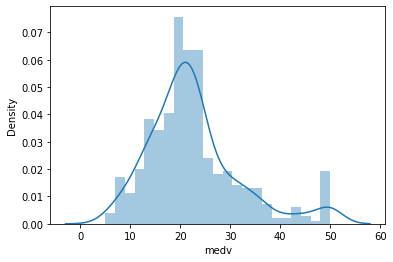

In [50]:
sns.distplot(df["medv"])

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
X = df.drop("medv",axis=1)
y = df["medv"]

In [53]:
mn = MinMaxScaler()

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [56]:
X_train.shape

(404, 10)

In [57]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [58]:
pred = lr.predict(X_test)

In [59]:
from sklearn.metrics import r2_score

In [60]:
r2_score(y_test,pred)

0.7424900345457477

In [61]:
r2_score(y_train,(lr.predict(X_train)))

0.7166745321714609

In [23]:
ls = Lasso()
ls.fit(X_train,y_train)

Lasso()

In [24]:
ls_pred = ls.predict(X_test)

In [25]:
r2_score(y_test,ls_pred)

0.6776294232065305

In [26]:
ls.coef_

array([-0.03258086,  0.05326452, -0.        ,  0.        , -0.        ,
        0.6756821 ,  0.01471255, -0.69035343,  0.2673241 , -0.01624408,
       -0.70059219,  0.00768029, -0.73822522])

In [27]:
list(zip(X.columns, ls.coef_))

[('crim', -0.032580864734729396),
 ('zn', 0.05326451543484644),
 ('indus', -0.0),
 ('chas', 0.0),
 ('nox', -0.0),
 ('rm', 0.6756820968523213),
 ('age', 0.014712554367416919),
 ('dis', -0.6903534295077629),
 ('rad', 0.2673240967484404),
 ('tax', -0.016244081149924726),
 ('ptratio', -0.7005921931166613),
 ('black', 0.007680293034958696),
 ('lstat', -0.7382252203983442)]

In [28]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
